# Importação dos Dados e Bibliotecas.

In [1]:
import tensorflow as tf
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
dados = pd.read_csv('Churn_Modelling.csv')
dados.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


#Informações dos Dados.

In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
dados.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Clientes com maiores pontuações de crédito.

In [5]:
maiores_pontuacoes = dados.nlargest(20,'CreditScore')
maiores_pontuacoes

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
38,39,15717426,Armstrong,850,France,Male,36,7,0.00,1,1,1,40812.90,0
180,181,15716334,Rozier,850,Spain,Female,45,2,122311.21,1,1,1,19482.50,0
200,201,15604482,Chiemezie,850,Spain,Male,30,2,141040.01,1,1,1,5978.20,0
223,224,15733247,Stevenson,850,France,Male,33,10,0.00,1,1,0,4861.72,1
259,260,15607178,Welch,850,Germany,Male,38,3,54901.01,1,1,1,140075.55,0
356,357,15611759,Simmons,850,Spain,Female,57,8,126776.30,2,1,1,132298.49,0
411,412,15760431,Pino,850,France,Male,38,1,0.00,2,1,1,80006.65,0
451,452,15785798,Uchechukwu,850,France,Male,40,9,0.00,2,0,1,119232.33,0
466,467,15663252,Olisanugo,850,Spain,Female,32,9,0.00,2,1,1,18924.92,0


Verificando se os clientes com maiores idades tendem a possuir um maior balanço financeiro.

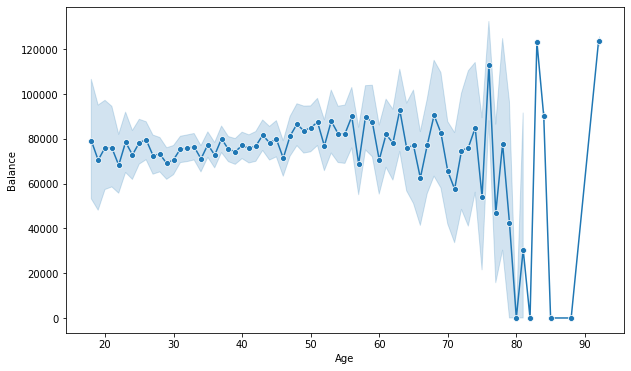

In [6]:
plt.figure(figsize=(10,6))
sns.lineplot(data=dados,x='Age',y='Balance',marker='o')
plt.show()

Verificando qual genêro relativamente possui mais cartões.

<Figure size 720x432 with 0 Axes>

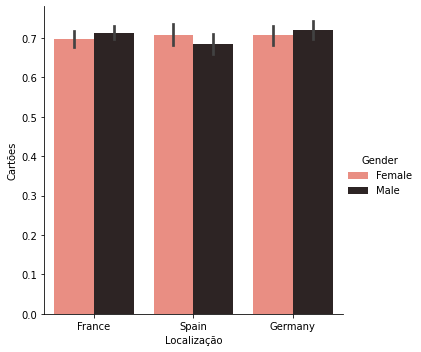

In [7]:
plt.figure(figsize=(10,6))
sns.catplot(data=dados,kind='bar',
            x='Geography',y='HasCrCard',
            hue='Gender',palette='dark:salmon_r')
plt.xlabel('Localização')
plt.ylabel('Cartões')
plt.show()

Distribuição dos Salários Estimados.

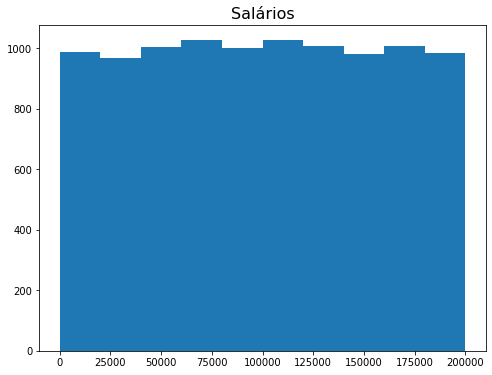

In [8]:
plt.figure(figsize=(8,6))
plt.hist(dados['EstimatedSalary'])
plt.title('Salários',fontsize=16)
plt.show()

Identificando se o banco perde muitos clientes em geral idependente de qualquer outra coisa (1=Sair, 0=Não Sair).

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


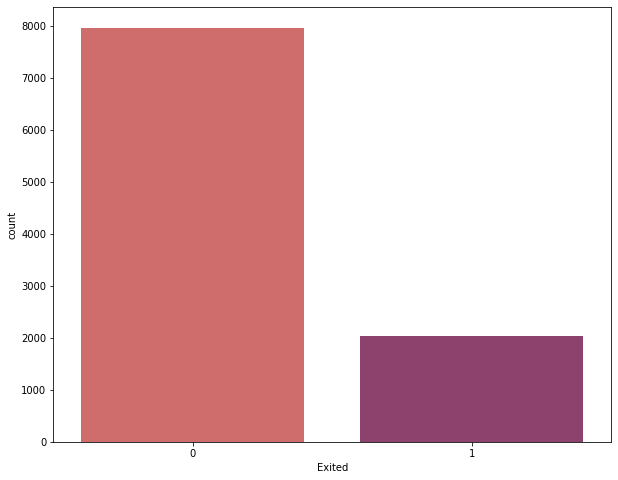

In [9]:
plt.figure(figsize=(10,8))
sns.countplot(dados['Exited'],palette='flare')
plt.show()

Analise das correlações dos dados de interesse.

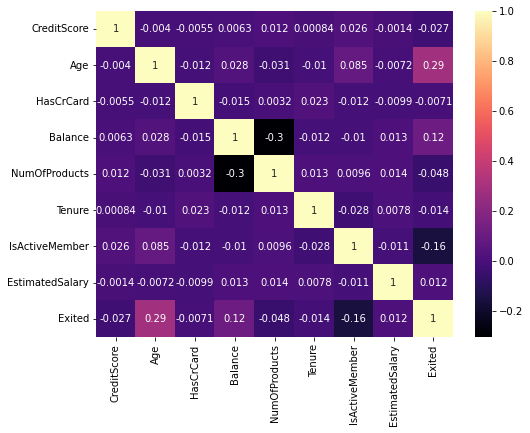

In [10]:
plt.figure(figsize=(8,6))
interesse = dados[['CreditScore','Age','HasCrCard','Balance','NumOfProducts',
                   'Tenure','IsActiveMember','EstimatedSalary','Exited']]
correlacao = interesse.corr()

sns.heatmap(correlacao,annot=True,cmap='magma')
plt.show()

#Pré-Processamento no Dados

In [11]:
X = dados[['CreditScore','Age','HasCrCard','IsActiveMember','EstimatedSalary']]
y = dados[['Exited']]

In [12]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

In [13]:
modelo_profundo = keras.Sequential()

In [14]:
modelo_profundo.add(keras.layers.Dense(18,input_dim=5,use_bias=False,
                                       kernel_initializer='random_uniform',
                                       activation='relu'))
modelo_profundo.add(keras.layers.Dense(15,use_bias=False,
                                       kernel_initializer='random_uniform',
                                       activation='relu'))
modelo_profundo.add(keras.layers.Dense(6,use_bias=False,
                                       kernel_initializer='random_uniform',
                                       activation='relu'))

In [15]:
stop = keras.callbacks.EarlyStopping(monitor='loss', patience=5)

In [58]:
erro_abs = keras.losses.MeanAbsoluteError()
modelo_profundo.compile(loss=erro_abs,optimizer='adam')

In [59]:
modelo_profundo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18)                90        
                                                                 
 dense_1 (Dense)             (None, 15)                270       
                                                                 
 dense_2 (Dense)             (None, 6)                 90        
                                                                 
Total params: 450
Trainable params: 450
Non-trainable params: 0
_________________________________________________________________


In [66]:
X_treino,X_teste,y_treino,y_teste = train_test_split(X,y,test_size=0.2)

# Previsão e Avaliação do Modelo De Aprendizagem Profunda.

In [ ]:
modelo_profundo.fit(X_treino,y_treino,epochs = 500,callbacks=[stop])

In [68]:
previsoes = modelo_profundo.predict(X_teste)

63/63 [==============================] - 0s 1ms/step


In [69]:
previsoes_ = pd.DataFrame(previsoes)

In [70]:
avaliacao = keras.metrics.Accuracy(dtype=None)
avaliacao.update_state(y_teste,previsoes_.loc[:,0])

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=1.0>

In [71]:
avaliacao.result().numpy()

0.9354785